In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import seaborn as sns
import nltk

In [2]:
def remove_punctuation(text):
    """Removes punctuation."""
    acceptable = ['£','%']
    text = text.replace('\n', " ").replace('\t','').replace('\r','')
    clean_chars = [char.lower() for char in text if char.isalnum() or char.isspace() or (char in acceptable)]
    return "".join(clean_chars)


def csv_to_data_frame(file_name):  
    """Coverts a csv into a pandas DataFrame"""
    return pd.read_csv(file_name, engine='python')  

def replace_tilde(df):
    df = df.replace('~~~', '', regex=True)
    return df


In [3]:
data = csv_to_data_frame('data/bt_data_with_locations.csv')

In [4]:
#Let's start by cleaning the content column 
data['content_edited'] = data['content'].apply(lambda x : remove_punctuation(x))

In [5]:
data = replace_tilde(data)

## Word Tokenization

Word tokenizer breaks text paragraph into words.Let's proceed to convert the content into tokens

In [6]:
from nltk.tokenize import word_tokenize

data['content_edited'] = data['content_edited'].apply(lambda x : word_tokenize(x))

data['content_edited'].head()

0    [awful, service, awful, internet, speed, and, ...
1    [poor, customer, service, had, to, speak, to, ...
2    [dreadful, in, every, aspect, it, simply, does...
3    [shocking, service, placed, order, got, told, ...
4    [very, unhappy, with, connection, quality, and...
Name: content_edited, dtype: object

## Stopwords

Stopwords considered as noise in the text. Text may contain stop words such as is, am, are, this, a, an, the, etc

In NLTK for removing stopwords, we need to create a list of stopwords and filter out your list of tokens from these words.

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/elizabetharevalo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords

# List of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Remove stopwords
data['content_edited'] = data['content_edited'].apply(lambda x: [item for item in x if item not in stopwords])

data['content_edited'].head()


0    [awful, service, awful, internet, speed, relia...
1    [poor, customer, service, speak, 7, people, an...
2        [dreadful, every, aspect, simply, work, care]
3    [shocking, service, placed, order, got, told, ...
4    [unhappy, connection, quality, customer, service]
Name: content_edited, dtype: object

## Remove invalid words

In [9]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     /Users/elizabetharevalo/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [10]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/elizabetharevalo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
words1 = set(nltk.corpus.words.words())
words2 = set(nltk.corpus.wordnet.words())
words = set.union(words1, words2)

data['content_edited'] = data['content_edited'].apply(lambda x:[item for item in x if item in words])
data['content_edited'].head()

0    [awful, service, awful, internet, speed, relia...
1    [poor, customer, service, speak, 7, people, an...
2        [dreadful, every, aspect, simply, work, care]
3    [shocking, service, placed, order, got, told, ...
4    [unhappy, connection, quality, customer, service]
Name: content_edited, dtype: object

In [12]:
data['content_edited'] = data['content_edited'].apply(lambda x: ' '.join([item for item in x]))

data['content_edited'].head()

0    awful service awful internet speed reliability...
1    poor customer service speak 7 people anyone co...
2               dreadful every aspect simply work care
3    shocking service placed order got told arrive ...
4          unhappy connection quality customer service
Name: content_edited, dtype: object

## Lemmatization

Lemmatization reduces words to their base word, which is linguistically correct lemmas. 
It transforms root word with the use of vocabulary and morphological analysis.

In [13]:
from nltk.stem.wordnet import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

data['content_edited'] = data['content_edited'].apply(wordnet_lem.lemmatize)

data['content_edited'].head()

0    awful service awful internet speed reliability...
1    poor customer service speak 7 people anyone co...
2               dreadful every aspect simply work care
3    shocking service placed order got told arrive ...
4          unhappy connection quality customer service
Name: content_edited, dtype: object

In [14]:
data['content'] = data['content_edited']
data.drop('content_edited', inplace=True, axis=1)

## Word cloud

In [15]:
all_words = ' '.join([word for word in data['content']])

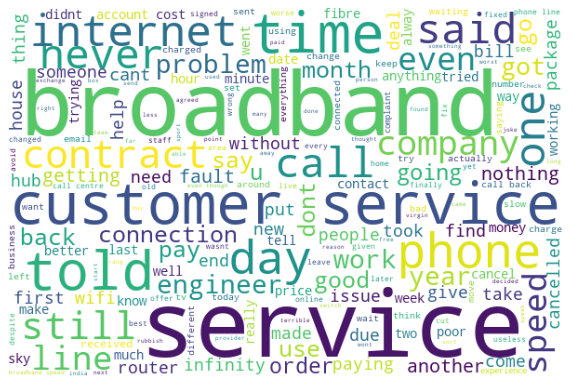

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white",
                     width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');


## Frequency distributions

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/elizabetharevalo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
all_words = ' '.join([word for word in data['content']])
words = nltk.word_tokenize(all_words)
fd = FreqDist(words)

In [19]:
#Most common words
fd.most_common(3)

[('service', 2955), ('broadband', 2072), ('customer', 1777)]

In [20]:
# Plot common words
# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

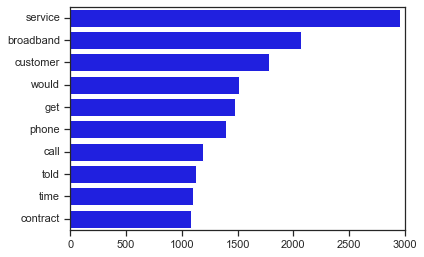

In [21]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');

## Collocations 

Bigrams: Frequent two-word combinations

In [22]:
finder = nltk.collocations.BigramCollocationFinder.from_words(words)

In [23]:
finder.ngram_fd.most_common(5)

[(('customer', 'service'), 1066),
 (('call', 'back'), 183),
 (('customer', 'services'), 173),
 (('phone', 'line'), 165),
 (('call', 'centre'), 156)]

In [24]:
finder.ngram_fd.tabulate(5)



 ('customer', 'service')         ('call', 'back') ('customer', 'services')        ('phone', 'line')       ('call', 'centre') 
                    1066                      183                      173                      165                      156 


## Using NLTK’s Pre-Trained Sentiment Analyzer

NLTK already has a built-in, pretrained sentiment analyzer called VADER (Valence Aware Dictionary and sEntiment Reasoner).

In [25]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/elizabetharevalo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [26]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [27]:
#Polarity scores
#Use the polarity_scores method:

data['polarity'] = data['content'].apply(lambda x: analyzer.polarity_scores(x))
data['polarity'].head()

0    {'neg': 0.396, 'neu': 0.604, 'pos': 0.0, 'comp...
1    {'neg': 0.159, 'neu': 0.771, 'pos': 0.069, 'co...
2    {'neg': 0.287, 'neu': 0.396, 'pos': 0.317, 'co...
3    {'neg': 0.103, 'neu': 0.768, 'pos': 0.129, 'co...
4    {'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp...
Name: polarity, dtype: object

In [28]:
data = pd.concat(
    [data.drop(['polarity'], axis=1), 
     data['polarity'].apply(pd.Series)], axis=1)

In [29]:
data['sentiment'] = data['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')

In [30]:
amount_of_reviews = data['sentiment'].value_counts()
amount_of_reviews

negative    1982
positive    1099
neutral      111
Name: sentiment, dtype: int64

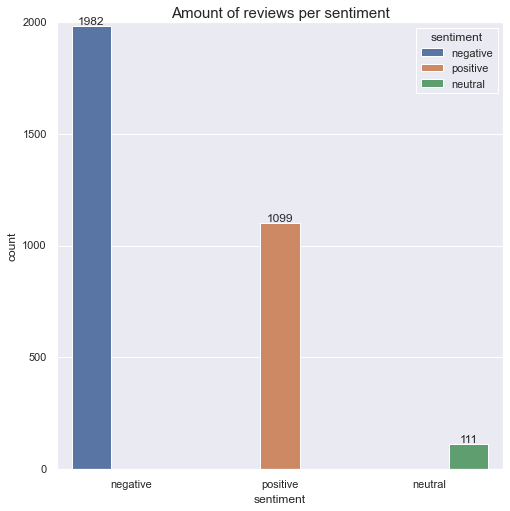

In [31]:
sns.set(rc={'figure.figsize':(8,8)})


ax = sns.countplot(x='sentiment', data=data, hue='sentiment')
ax.set_title('Amount of reviews per sentiment', fontsize=15)

for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [32]:
percentage_of_reviews = data['sentiment'].value_counts(normalize=True) * 100
percentage_of_reviews

negative    62.092732
positive    34.429825
neutral      3.477444
Name: sentiment, dtype: float64

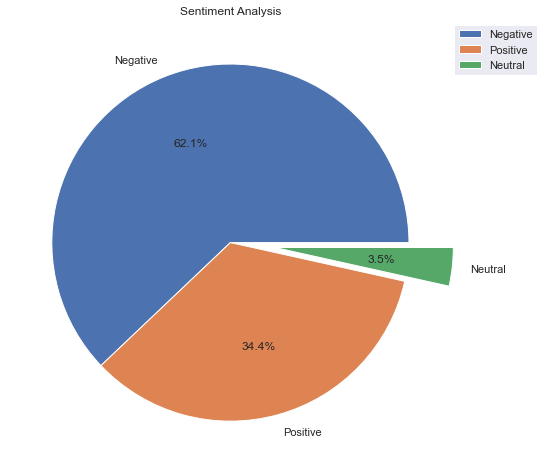

In [33]:
labels = ['Negative', 'Positive', 'Neutral']
sentiment_data  = data['sentiment'].value_counts(normalize=True)
plt.axis("equal")
plt.pie(sentiment_data, explode=(0,0,0.25), labels=labels, autopct='%1.1f%%')
plt.legend(bbox_to_anchor = (1.2,1))
plt.title('Sentiment Analysis')
plt.show()

sentiment   negative  positive
location                      
London         245.0     113.0
Manchester      42.0       NaN
York            26.0      21.0
Derby           22.0       NaN
Glasgow         22.0       NaN
England         21.0       NaN
Birmingham      20.0       NaN
Edinburgh       19.0       NaN


<Figure size 1440x720 with 0 Axes>

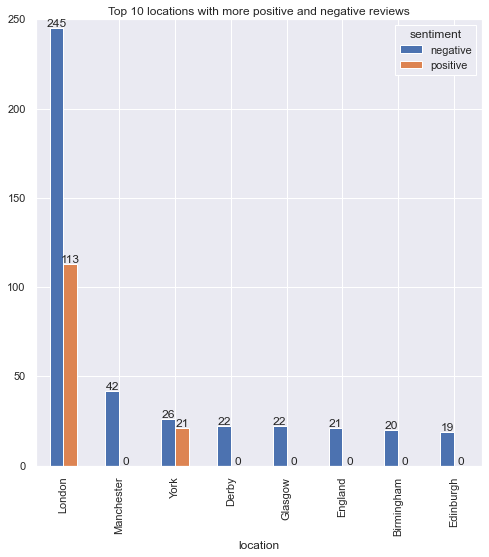

In [34]:
locations_without_unknown = data[data['location'] != 'Unknown']

top_10_locations_with_reviews_per_sentiment = locations_without_unknown.groupby(["sentiment", "location"])["location"].count().nlargest(10)

top_10 = top_10_locations_with_reviews_per_sentiment.unstack().T


print(top_10)

plt.figure(figsize = (20,10))

ax = top_10.plot(kind='bar')
ax.set_title('Top 10 locations with more positive and negative reviews')

for container in ax.containers:
    ax.bar_label(container)

plt.show()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


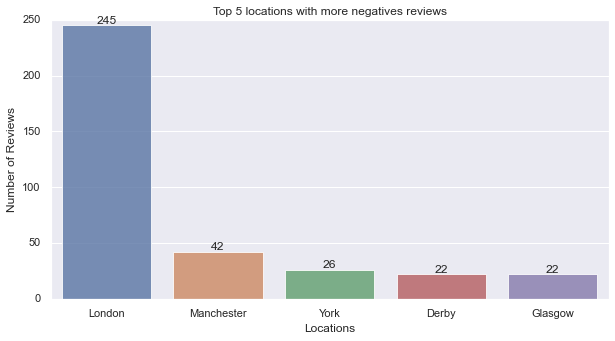

In [36]:
#Filter the data to get only the negatives reviews
negative_reviews_data = data[data['sentiment'] == 'negative']

#Filter the data to get only the locations without unknown values
locations_without_unknown = negative_reviews_data[negative_reviews_data['location'] != 'Unknown']
locations_without_unknown_count = locations_without_unknown['location'].value_counts()[:5,]

#Ploting the figures
plt.figure(figsize=(10,5))
ax = sns.barplot(locations_without_unknown_count.index, locations_without_unknown_count.values, alpha=0.8)
plt.title('Top 5 locations with more negatives reviews')
plt.ylabel('Number of Reviews', fontsize=12)
plt.xlabel('Locations', fontsize=12)
for container in ax.containers:
    ax.bar_label(container)
    
plt.show()
